In [46]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sbn 

import statsmodels.api as sm
from statsmodels.formula.api import ols, logit

import os 

# Aggregate results

In [2]:
runs = os.listdir('../output/')

df = [] 
df2 = []
for run in runs: 
    run_res_path = '../output/' + run + '/run_results.csv'
    if os.path.exists(run_res_path): 
        df.append( pd.read_csv(run_res_path) ) 
        
    prob_res_path = '../output/' + run + '/unlabeled_lines_results.csv' 
    if os.path.exists(prob_res_path): 
        prob_res = pd.read_csv(prob_res_path).assign(run_id=run)
        df2.append(prob_res)
        
run_res = pd.concat(df, axis=0, ignore_index=True)
prob_res = pd.concat(df2, axis=0, ignore_index=True).rename({'Unnamed: 0':'obs_id'}, axis=1)
prob_res.head()

,obs_id,pc1,pc2,treatment,cell_line,prob_res,prob_sens,call,run_id
0,0,-0.132900,-0.051430,neratinib,A355QFS76,0.597799,0.402201,res,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979
1,1,-0.165598,0.015103,neratinib,D277H,0.279574,0.720426,sens,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979
2,2,-0.161371,0.002826,neratinib,D638H,0.327116,0.672884,sens,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979
3,3,-0.147015,-0.021987,neratinib,D639E,0.452057,0.547943,sens,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979
4,4,-0.205504,0.069454,neratinib,D769Y,0.098454,0.901546,sens,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979


In [3]:
run_res.head()

,Unnamed: 0,accuracy(train),pc1_var,pc2_var,kmeans_inertia,res_line,sens_line,drug,nclus,resample_sz,load,run_id
0,0,1.000000,0.476802,1.118050e-01,2.669402,T798I,WT,neratinib,15,75,raw,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979
1,0,1.000000,0.562000,1.157656e-01,5.697522,T798I,WT,neratinib,10,150,normalized,013c1f9a-8ecb-485d-a354-e8be76ccfbb1
2,0,0.857143,1.000000,8.076398e-32,6.614985,T798I,WT,neratinib,2,125,raw,019b3844-9bec-4f03-85cd-8cfcdfb5fe5d
3,0,1.000000,0.518103,1.195254e-01,1.922279,T798I,WT,neratinib,10,50,normalized,02156603-8d3f-4638-beb2-f858ca5654f1
4,0,0.928571,0.493042,1.181248e-01,2.664717,T798I,WT,neratinib,15,75,raw,0297bb60-7a87-4212-8752-9edcf6bc9aff


# Train accuracy 

This is a good metric of how easily sepearable the classes are.

In [4]:
lm = ols('accuracy ~ nclus + resample_sz + load', data=run_res.rename({'accuracy(train)':'accuracy'}, axis=1)).fit() #Specify C for Categorical
print(lm.params)
print()
print(sm.stats.anova_lm(lm, typ=2))

Intercept      0.974441
load[T.raw]   -0.053883
nclus         -0.000462
resample_sz    0.000098
dtype: float64

               sum_sq     df           F        PR(>F)
load         0.336087    1.0  129.551576  1.289361e-26
nclus        0.021657    1.0    8.348295  4.042845e-03
resample_sz  0.005622    1.0    2.167201  1.416664e-01
Residual     1.193348  460.0         NaN           NaN


<AxesSubplot:xlabel='nclus', ylabel='accuracy(train)'>

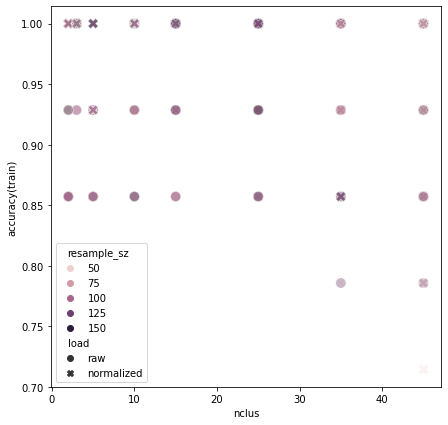

In [68]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='nclus', y='accuracy(train)', style='load', hue='resample_sz', alpha=0.25, data=run_res, s=100)

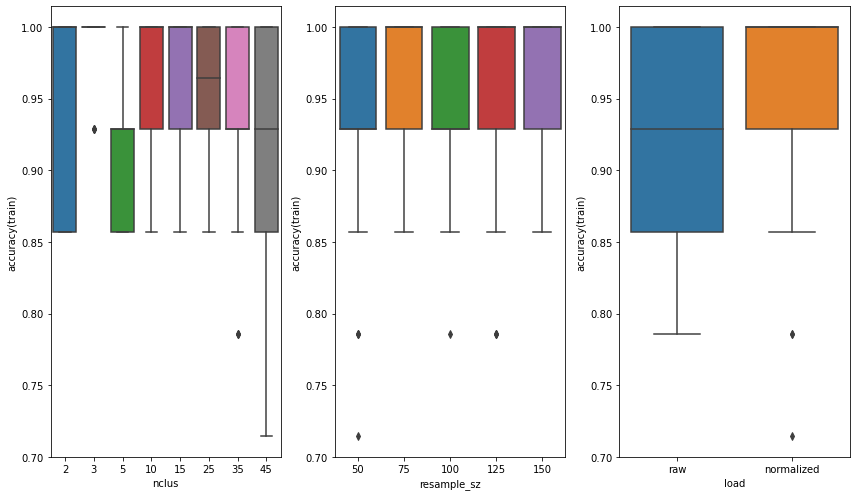

In [69]:
f, axes = plt.subplots(1,3, figsize=(12,7))
sbn.boxplot(x='nclus', y='accuracy(train)', data=run_res, ax=axes.flat[0],)
sbn.boxplot(x='resample_sz', y='accuracy(train)', data=run_res, ax=axes.flat[1],)
sbn.boxplot(x='load', y='accuracy(train)', data=run_res, ax=axes.flat[2],)
plt.tight_layout()
plt.show()

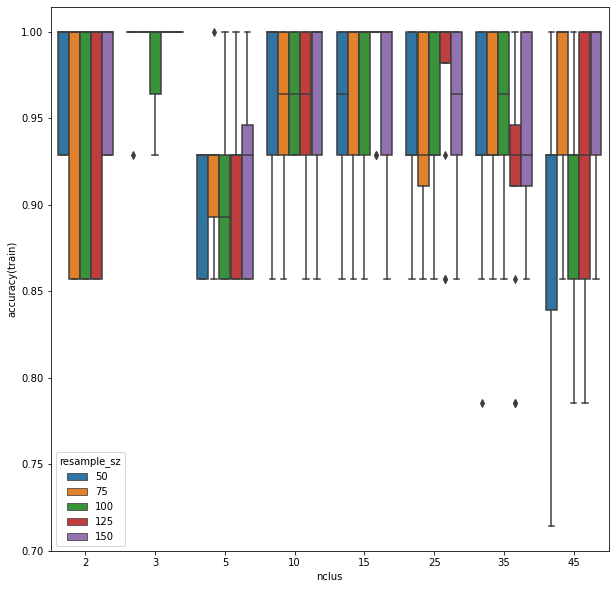

In [6]:
plt.figure(figsize=(10,10))
sbn.boxplot(x='nclus', y='accuracy(train)', hue='resample_sz', data=run_res)
plt.show()

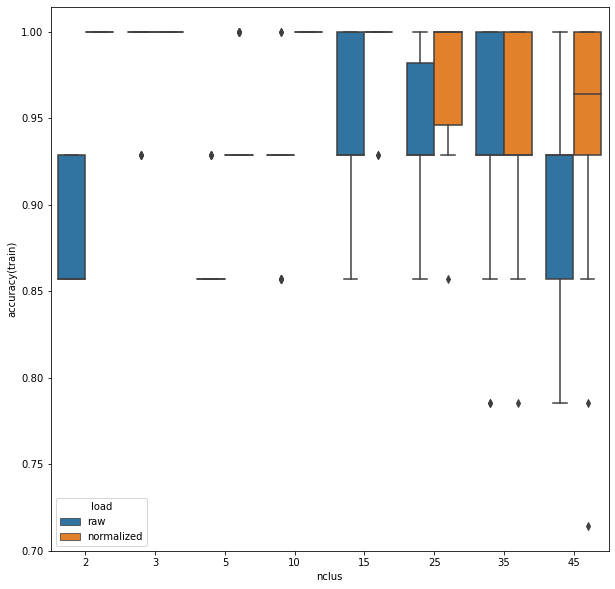

In [7]:
plt.figure(figsize=(10,10))
sbn.boxplot(x='nclus', y='accuracy(train)', hue='load', data=run_res)
plt.show()

# PCA explained variance 

In [8]:
run_res2 = run_res.assign(var_explained = lambda x: x.pc1_var + x.pc2_var)
run_res2.head()

,Unnamed: 0,accuracy(train),pc1_var,pc2_var,kmeans_inertia,res_line,sens_line,drug,nclus,resample_sz,load,run_id,var_explained
0,0,1.000000,0.476802,1.118050e-01,2.669402,T798I,WT,neratinib,15,75,raw,00fdcc2f-e3ce-4e6e-918e-3ed43ca1c979,0.588607
1,0,1.000000,0.562000,1.157656e-01,5.697522,T798I,WT,neratinib,10,150,normalized,013c1f9a-8ecb-485d-a354-e8be76ccfbb1,0.677766
2,0,0.857143,1.000000,8.076398e-32,6.614985,T798I,WT,neratinib,2,125,raw,019b3844-9bec-4f03-85cd-8cfcdfb5fe5d,1.000000
3,0,1.000000,0.518103,1.195254e-01,1.922279,T798I,WT,neratinib,10,50,normalized,02156603-8d3f-4638-beb2-f858ca5654f1,0.637628
4,0,0.928571,0.493042,1.181248e-01,2.664717,T798I,WT,neratinib,15,75,raw,0297bb60-7a87-4212-8752-9edcf6bc9aff,0.611167


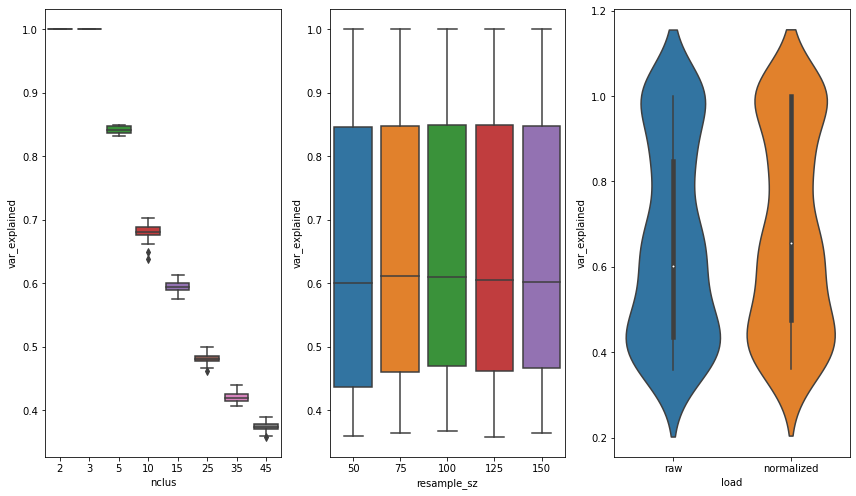

In [9]:
f, axes = plt.subplots(1,3, figsize=(12,7))
sbn.boxplot(x='nclus', y='var_explained', data=run_res2, ax=axes.flat[0],)
sbn.boxplot(x='resample_sz', y='var_explained', data=run_res2, ax=axes.flat[1],)
sbn.violinplot(x='load', y='var_explained', data=run_res2, ax=axes.flat[2],)
plt.tight_layout()
plt.show()

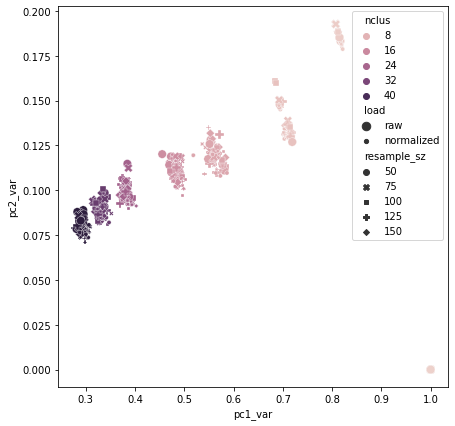

In [10]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='pc1_var', y='pc2_var', hue='nclus', data=run_res2, style='resample_sz', size='load')
plt.show()

# Kmeans sum-of-squares (inertia) 

Wellness of fit.

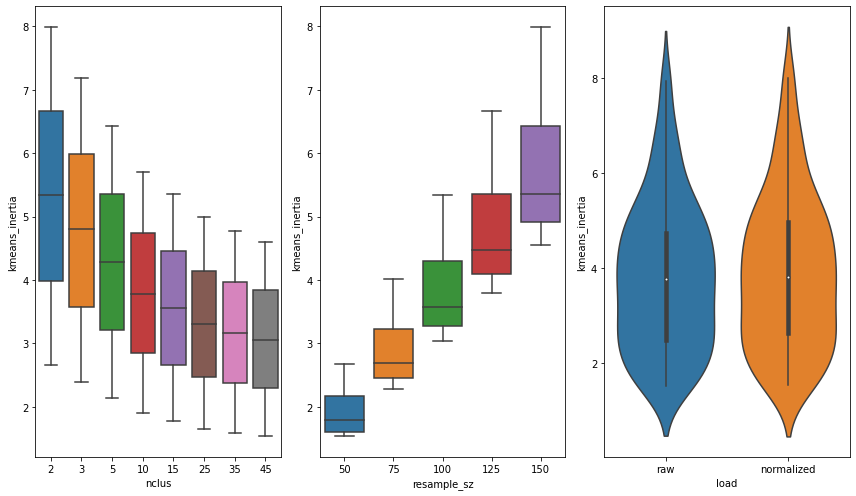

In [11]:
f, axes = plt.subplots(1,3, figsize=(12,7))
sbn.boxplot(x='nclus', y='kmeans_inertia', data=run_res2, ax=axes.flat[0],)
sbn.boxplot(x='resample_sz', y='kmeans_inertia', data=run_res2, ax=axes.flat[1],)
sbn.violinplot(x='load', y='kmeans_inertia', data=run_res2, ax=axes.flat[2],)
plt.tight_layout()
plt.show()

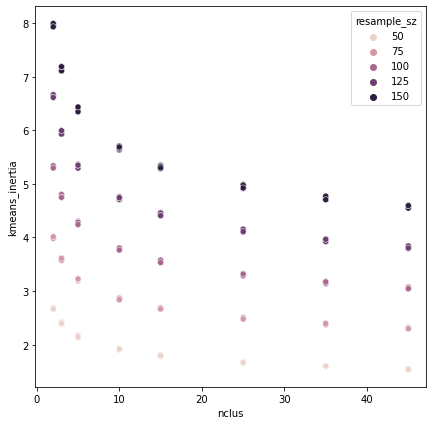

In [12]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='nclus', y='kmeans_inertia', hue='resample_sz', data=run_res2)
plt.show()

# Concordant Calls 

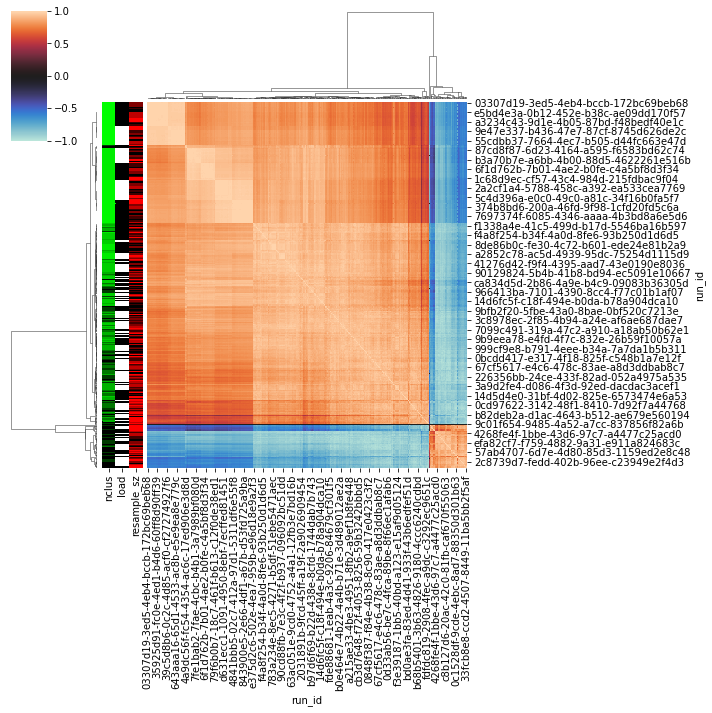

In [14]:
norm = lambda x, y: (x-min(y))/ (max(y) - min(y)) 

nclus_ = {row.run_id:[0., 1- norm(row.nclus,run_res.nclus),0., 0.5] for i,row in run_res.iterrows()}
nclus_colors = run_res['run_id'].map(nclus_).rename('nclus')

load_ = {row.run_id:'k' if (row.load == 'normalized') else 'w' for i,row in run_res.iterrows()}
load_colors = run_res['run_id'].map(load_).rename('load')

resamp_ = {row.run_id:[1 - norm(row.resample_sz,run_res.resample_sz), 0., 0., 0.5] for i,row in run_res.iterrows()}
resamp_colors = run_res['run_id'].map(resamp_).rename('resample_sz')

row_colors = pd.concat([nclus_colors, load_colors, resamp_colors], axis=1)
row_colors = row_colors.set_index(run_res.run_id)

#print(row_colors)

#ids_tokeep = run_res[lambda x: (x.nclus < 35)].run_id.values
#prob_res2 = prob_res[lambda x: x.run_id.isin(ids_tokeep)]

prob_res2 = prob_res.merge(run_res, on='run_id').pivot(columns='run_id', index='obs_id', values='prob_res')
res_mat = prob_res2.corr().fillna(0)
sbn.clustermap(res_mat, vmin=-1, vmax=1, center=0, row_colors=row_colors, figsize=(10,10))

# concordant calls

In [15]:
conc_calls = prob_res.groupby(['obs_id', 'call']).count()[['run_id']].reset_index().set_index('obs_id').pivot(columns='call', values='run_id').assign(prop_call_res=lambda x: x.res / (x.res + x.sens))

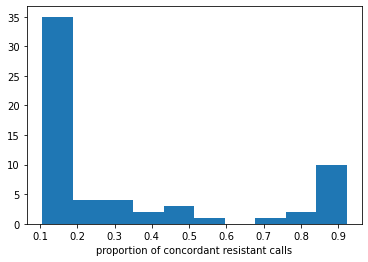

In [70]:
plt.figure()
plt.hist(conc_calls.prop_call_res)
plt.xlabel('proportion of concordant resistant calls')
plt.show()

In [17]:
np.sum( conc_calls.prop_call_res > 0.75 )

12

In [18]:
conc_res_obs_ids = conc_calls[conc_calls.prop_call_res > 0.75].reset_index().obs_id

In [19]:
prob_res[lambda x: x.obs_id.isin(conc_res_obs_ids)].cell_line.unique()

array(['G778S779insLPS', 'L755T759DEL', 'R456C', 'R678Q', 'T798I',
       'V842I', 'Y835F'], dtype=object)

# Model variance 

Same config params, same results? 

In [59]:
def get_model_variance_stats(nclus, load, sz): 
    
    _ids = run_res[lambda x: (x.nclus==nclus) & (x.load == load) & (x.resample_sz == sz)].run_id
    mvar_ = prob_res[lambda x: x.run_id.isin(_ids)]
    mvar_res = mvar_[['run_id', 'obs_id', 'prob_res']].pivot(columns='run_id', values='prob_res', index='obs_id')
    mvar_mat = mvar_res.corr()

    triu_idx = np.triu_indices(mvar_mat.shape[0], k=1)
    corrs = mvar_mat.values[triu_idx]
    corr_mean = corrs.mean()
    corr_std = corrs.std()
    corr_min = corrs.min()
    corr_max = corrs.max()
    return corr_mean, corr_std, corr_min, corr_max

var_res = {'nclus':[], 'load':[], 'resample_sz':[], 'corr_mean':[], 'corr_std':[], 'corr_min':[], 'corr_max':[]}
for nc in run_res.nclus.unique(): 
    for l in run_res.load.unique(): 
        for sz in run_res.resample_sz.unique(): 
            corr_mean, corr_std, corr_min, corr_max = get_model_variance_stats(nc, l, sz)
            var_res['nclus'].append(nc)
            var_res['load'].append(l)
            var_res['resample_sz'].append(sz)
            var_res['corr_mean'].append(corr_mean)
            var_res['corr_std'].append(corr_std)
            var_res['corr_min'].append(corr_min)
            var_res['corr_max'].append(corr_max)
            
var_res = pd.DataFrame(var_res).assign(corr_min_unit = lambda x: x.corr_min.clip(0,1))
var_res.head()

,nclus,load,resample_sz,corr_mean,corr_std,corr_min,corr_max,corr_min_unit
0,15,raw,75,0.935192,0.020712,0.905259,0.972514,0.905259
1,15,raw,150,0.938284,0.016595,0.902949,0.969040,0.902949
2,15,raw,125,0.949348,0.019311,0.919606,0.982665,0.919606
3,15,raw,50,0.908513,0.033114,0.834107,0.959517,0.834107
4,15,raw,100,0.938958,0.017862,0.906228,0.966396,0.906228


In [60]:
lm = logit('corr_min_unit ~ nclus + resample_sz + load', data=var_res).fit() #Specify C for Categorical
print(lm.params)
print()
print(lm.conf_int())
#print()
#print(sm.stats.anova_lm(lm))

Optimization terminated successfully.
         Current function value: 0.197250
         Iterations 7
Intercept      4.222236
load[T.raw]   -0.420407
nclus         -0.162454
resample_sz    0.002738
dtype: float64

                    0         1
Intercept    1.429946  7.014527
load[T.raw] -1.919332  1.078518
nclus       -0.229108 -0.095800
resample_sz -0.018269  0.023746


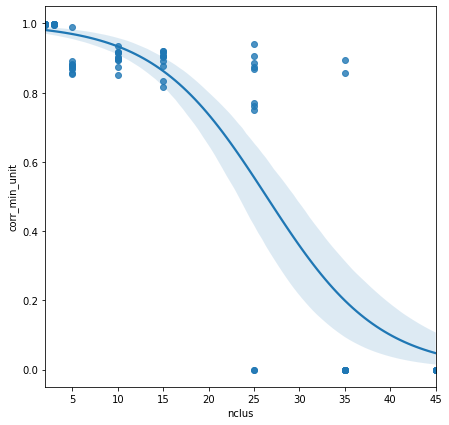

In [61]:
plt.figure(figsize=(7,7))
sbn.regplot(x='nclus', y='corr_min_unit', data=var_res, logistic=True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

No handles with labels found to put in legend.


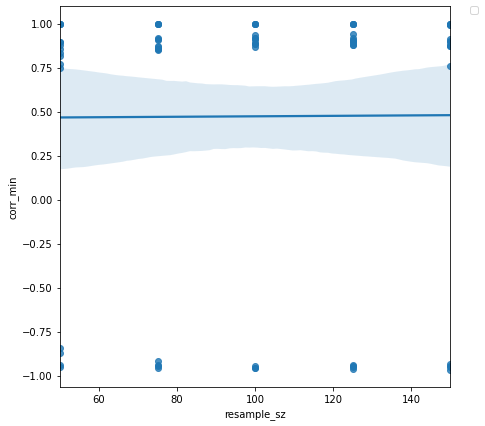

In [54]:
plt.figure(figsize=(7,7))
sbn.regplot(x='resample_sz', y='corr_min', data=var_res, logistic=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

No handles with labels found to put in legend.


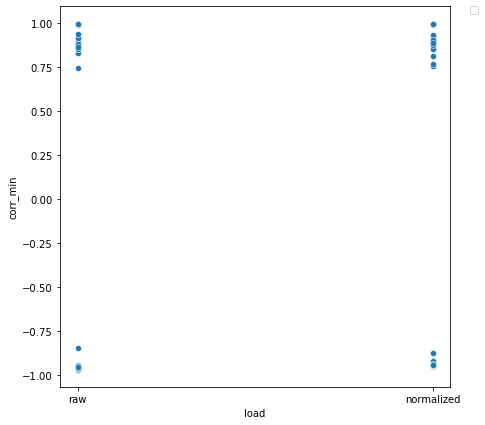

In [41]:
plt.figure(figsize=(7,7))
sbn.scatterplot(x='load', y='corr_min', data=var_res)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Stable Configs


In [71]:
var_res.head()

,nclus,load,resample_sz,corr_mean,corr_std,corr_min,corr_max,corr_min_unit
0,15,raw,75,0.935192,0.020712,0.905259,0.972514,0.905259
1,15,raw,150,0.938284,0.016595,0.902949,0.969040,0.902949
2,15,raw,125,0.949348,0.019311,0.919606,0.982665,0.919606
3,15,raw,50,0.908513,0.033114,0.834107,0.959517,0.834107
4,15,raw,100,0.938958,0.017862,0.906228,0.966396,0.906228


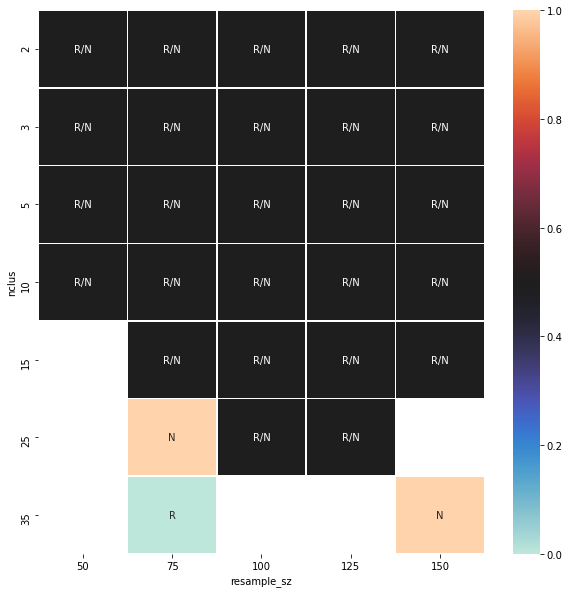

In [113]:
var_res2 = var_res[lambda x: x.corr_min > 0.85][['resample_sz', 'nclus', 'load']].groupby(['resample_sz', 'nclus']).agg('-'.join).reset_index()
var_mat = var_res2.assign(load= [0 if x=='raw' else (1 if x=='normalized' else 0.5) for x in var_res2.load])
labels = var_res2.assign(load= ['R' if x=='raw' else ('N' if x=='normalized' else 'R/N') for x in var_res2.load]).pivot(columns='resample_sz', index='nclus', values='load')
var_mat = var_mat.pivot(columns='resample_sz', index='nclus', values='load')

plt.figure(figsize=(10,10))
sbn.heatmap(var_mat, linewidths=.5, annot=labels.values, fmt='', vmin=0, vmax=1, center=0.5)
plt.show()

In [139]:
acc_mat

load
resample_sz nclus      
50          2       1.0
            3       1.0
            10      1.0
75          2       1.0
            3       0.5
            10      1.0
            15      1.0
100         2       1.0
            3       1.0
            10      1.0
125         2       1.0
            3       0.5
            10      1.0
            15      1.0
150         2       1.0
            3       0.5
            10      1.0
            15      1.0

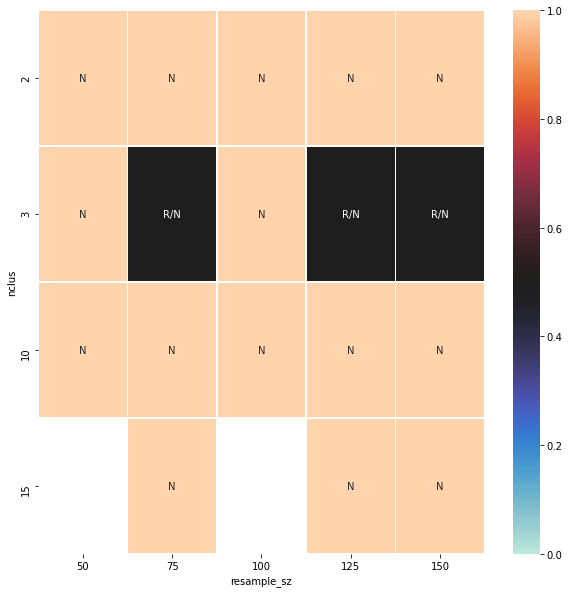

In [142]:
hi_ac = run_res.groupby(['nclus', 'resample_sz', 'load']).agg('mean')[['accuracy(train)']][lambda x: x['accuracy(train)'] == 1.]

hi_ac = hi_ac.reset_index()[['nclus', 'resample_sz', 'load']].groupby(['resample_sz', 'nclus']).agg('-'.join).reset_index()

acc_mat = hi_ac.assign(load= [0 if x=='raw' else (1 if x=='normalized' else 0.5) for x in hi_ac.load]).pivot(columns='resample_sz', index='nclus', values='load')
labels = hi_ac.assign(load= ['R' if x=='raw' else ('N' if x=='normalized' else 'R/N') for x in hi_ac.load]).pivot(columns='resample_sz', index='nclus', values='load')

plt.figure(figsize=(10,10))
sbn.heatmap(acc_mat, linewidths=.5, annot=labels.values, fmt='', vmin=0, vmax=1, center=0.5)
plt.show()

In [121]:


plt.figure(figsize=(10,10))
sbn.heatmap(var_mat, linewidths=.5, annot=labels.values, fmt='', vmin=0, vmax=1, center=0.5)
plt.show()

accuracy(train)
nclus resample_sz load                       
2     50          normalized              1.0
      75          normalized              1.0
      100         normalized              1.0
      125         normalized              1.0
      150         normalized              1.0
3     50          normalized              1.0
      75          normalized              1.0
                  raw                     1.0
      100         normalized              1.0
      125         normalized              1.0
                  raw                     1.0
      150         normalized              1.0
                  raw                     1.0
10    50          normalized              1.0
      75          normalized              1.0
      100         normalized              1.0
      125         normalized              1.0
      150         normalized              1.0
15    75          normalized              1.0
      125         normalized              1.0
      150         normalized              1.0